In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Мысли:  
Добавить дни недели  
добавить категориальную переменную Выходные  
Сделать лаговые фичи на 7-14 дней  
Нормализация

In [4]:
train_df.head()

,id,date,city_name,store_id,category_id,product_id,price,weather_desc,humidity,temperature,pressure,sales
0,1,2021-07-29,Москва,1,1,1,4.79,"переменная облачность, небольшой дождь",61.9375,23.1875,741.0000,26
1,2,2021-07-30,Москва,1,1,1,4.79,"переменная облачность, небольшой дождь",70.2500,22.1875,740.3125,37
2,3,2021-07-31,Москва,1,1,1,4.79,переменная облачность,52.6250,21.8125,741.6250,25
3,4,2021-08-01,Москва,1,1,1,4.79,"облачно, небольшой дождь",87.4375,20.0625,743.3125,26
4,5,2021-08-02,Москва,1,1,1,4.79,переменная облачность,66.1875,23.4375,739.6250,22


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666676 entries, 0 to 666675
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            666676 non-null  int64  
 1   date          666676 non-null  object 
 2   city_name     666676 non-null  object 
 3   store_id      666676 non-null  int64  
 4   category_id   666676 non-null  int64  
 5   product_id    666676 non-null  int64  
 6   price         666676 non-null  float64
 7   weather_desc  666676 non-null  object 
 8   humidity      666676 non-null  float64
 9   temperature   666676 non-null  float64
 10  pressure      666676 non-null  float64
 11  sales         666676 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 61.0+ MB


In [6]:
lst = ['store_id' ,'category_id', 'product_id', 'price' ]
for i in lst:
    print(i,'\n', train_df[i].unique())

store_id 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 152 153 154 156 157 158 159 160 162 163 164]
category_id 
 [1 2 3 4 5 7 8 9 6]
product_id 
 [ 1  2  4  5  7  8  9 10 11 12 13 14 16 17 18 20 21 24 25 26 28 29 30 32
 33 34 35  6  3 27 19 31]
price 
 [ 4.79  7.78  8.15 11.25 12.15  2.39  4.64  3.01  3.3   2.9   6.2   4.09
  4.18  3.51 18.63  2.52  5.9   1.93  3.83  6.02  2.49  6.58  3.    3.8
  2.48 11.2   7.68  2.02  3.65]


In [7]:
train_df['city_name'].unique()

array(['Москва', 'Санкт-Петербург', 'Краснодар', 'Самара',
       'Нижний Новгород', 'Ростов-на-Дону', 'Волгоград', 'Воронеж',
       'Казань', 'Екатеринбург'], dtype=object)

In [8]:
train_df['weather_desc'].unique()

array(['переменная облачность, небольшой дождь', 'переменная облачность',
       'облачно, небольшой дождь', 'дождь, гроза',
       'облачно, без существенных осадков',
       'переменная облачность, дождь', 'дождь', 'облачно', 'ясно',
       'облачно, небольшой снег',
       'переменная облачность, небольшие осадки',
       'облачно, небольшие осадки', 'снег', 'метель', 'осадки',
       'переменная облачность, небольшой снег'], dtype=object)

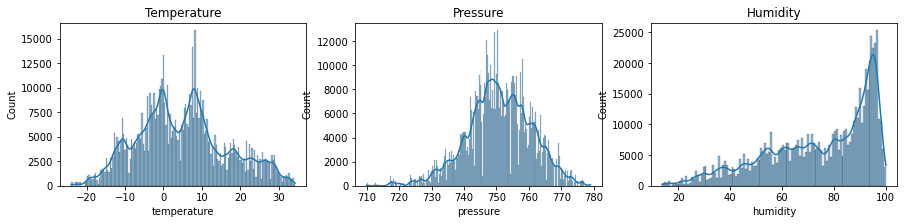

In [18]:
fig, ax = plt.subplots(1,3,figsize=(15, 3)) # Распеределение признаков
sns.histplot(train_df['temperature'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Temperature")
sns.histplot(train_df['pressure'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Pressure")
sns.histplot(train_df['humidity'], ax=ax[2], kde=True, legend=False)
ax[2].set_title("Humidity")
plt.show()

<AxesSubplot:>

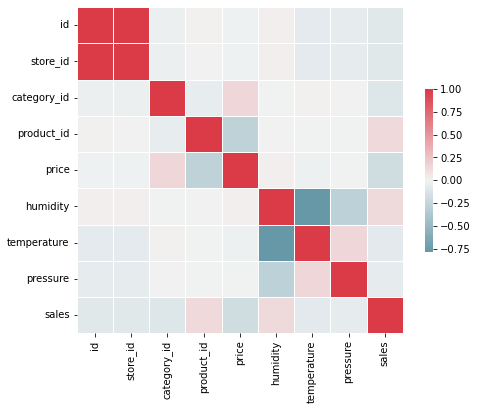

In [9]:
corr = train_df.corr()
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0., square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
# group = train_df[['date', 'city_name', 'sales']].groupby(['date', 'city_name'], as_index=False).sum()
# fig = px.line(group, x="date", y="sales", color='city_name')
# fig.update_layout(
#     title={
#         'text': "Количество заказов по регионам",
#         'y':0.95,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})
# fig.show() 

In [35]:
train_df['date'] = pd.to_datetime(train_df['date'].astype(str))
# train_df['weekday'] = (train_df['date'][i].weekday() for i in range(len(train_df)))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666676 entries, 0 to 666675
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            666676 non-null  int64         
 1   date          666676 non-null  datetime64[ns]
 2   city_name     666676 non-null  object        
 3   store_id      666676 non-null  int64         
 4   category_id   666676 non-null  int64         
 5   product_id    666676 non-null  int64         
 6   price         666676 non-null  float64       
 7   weather_desc  666676 non-null  object        
 8   humidity      666676 non-null  float64       
 9   temperature   666676 non-null  float64       
 10  pressure      666676 non-null  float64       
 11  sales         666676 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 61.0+ MB


In [38]:
train_df['date'][23].weekday()
# .weekday()

5

In [60]:
train_df['weekday'] = train_df['date'][0].weekday()
for i in tqdm_notebook(range(len(train_df))):
    train_df['weekday'][i] = (train_df['date'][i].weekday())
    # print(train_df['date'][i].weekday())
    

  0%|          | 0/666676 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [44]:
# train_df['weekday'][1] =(train_df['date'][1].weekday())

In [48]:
train_df['date'][1].weekday()

4

In [58]:
train_df['weekday'] = train_df['date'][0].weekday()

In [59]:
train_df

,id,date,city_name,store_id,category_id,product_id,price,weather_desc,humidity,temperature,pressure,sales,weekday
0,1,2021-07-29,Москва,1,1,1,4.79,"переменная облачность, небольшой дождь",61.9375,23.1875,741.0000,26,3
1,2,2021-07-30,Москва,1,1,1,4.79,"переменная облачность, небольшой дождь",70.2500,22.1875,740.3125,37,3
2,3,2021-07-31,Москва,1,1,1,4.79,переменная облачность,52.6250,21.8125,741.6250,25,3
3,4,2021-08-01,Москва,1,1,1,4.79,"облачно, небольшой дождь",87.4375,20.0625,743.3125,26,3
4,5,2021-08-02,Москва,1,1,1,4.79,переменная облачность,66.1875,23.4375,739.6250,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666671,666672,2022-02-09,Воронеж,164,1,35,2.48,"облачно, небольшой снег",89.1250,-4.3125,744.6875,11,3
666672,666673,2022-02-10,Воронеж,164,1,35,2.48,"облачно, небольшие осадки",92.5625,-0.9375,746.3125,17,3
666673,666674,2022-02-11,Воронеж,164,1,35,2.48,осадки,99.6875,-0.3125,745.3125,2,3
666674,666675,2022-02-12,Воронеж,164,1,35,2.48,"переменная облачность, небольшие осадки",91.8750,-2.2500,749.9375,7,3
